In [8]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 


In [9]:
df = pd.read_csv("\\BA_reviews1.csv",delimiter="|")
print(df.shape)
df.head(5)

(3023, 1)


,",reviews"
"0,Not Verified",Very good flight following an equally good f...
"1,Not Verified",An hour's delay due to late arrival of the i...
"2,""✅ Trip Verified",I booked through BA because Loganair don’t ...
"3,""✅ Trip Verified",British airways lost bags in LHR then found...
"4,""✅ Trip Verified",The check in process and reward/loyalty progr...


In [10]:
df.reset_index(drop=True,inplace=True)
df= df.rename(columns ={',reviews':"reviews"})
df =df.dropna()
df.head(5)
print(df.shape)

(2382, 1)


In [11]:
import re
import nltk
from nltk.corpus import stopwords

In [12]:
##Preprocessing - converting into lower case
def preprocess1(reviews:str):
   txt = re.sub("[^a-zA-Z]"," ",reviews)
   txt =txt.lower() 
   return txt
df["cln_rev"] =df["reviews"].apply(preprocess1)
df

,reviews,cln_rev
0,Very good flight following an equally good f...,very good flight following an equally good f...
1,An hour's delay due to late arrival of the i...,an hour s delay due to late arrival of the i...
2,I booked through BA because Loganair don’t ...,i booked through ba because loganair don t ...
3,British airways lost bags in LHR then found...,british airways lost bags in lhr then found...
4,The check in process and reward/loyalty progr...,the check in process and reward loyalty progr...
...,...,...
2576,Istanbul to London Heathrow with British Air...,istanbul to london heathrow with british air...
2577,London Heathrow to Houston on British Airway...,london heathrow to houston on british airway...
2578,We have flown with British Airways over 100 ...,we have flown with british airways over ...
2579,British Airways from Seattle to Johannesburg...,british airways from seattle to johannesburg...


In [13]:
#removed stopwords and punctuation in a text
nltk.download("punkt_tab")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
def punct(text :str):
   txt = nltk.word_tokenize(text)   
   fin_txt = [word for word in txt if word not in stop_words]
   return fin_txt
df["cl_rev1"] =df["cln_rev"].apply(punct)    
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,cln_rev,cl_rev1
0,Very good flight following an equally good f...,very good flight following an equally good f...,"[good, flight, following, equally, good, fligh..."
1,An hour's delay due to late arrival of the i...,an hour s delay due to late arrival of the i...,"[hour, delay, due, late, arrival, incoming, ai..."
2,I booked through BA because Loganair don’t ...,i booked through ba because loganair don t ...,"[booked, ba, loganair, representatives, manche..."
3,British airways lost bags in LHR then found...,british airways lost bags in lhr then found...,"[british, airways, lost, bags, lhr, found, sen..."
4,The check in process and reward/loyalty progr...,the check in process and reward loyalty progr...,"[check, process, reward, loyalty, program, mes..."


In [14]:
#lemmatize the text
nltk.download("wordnet")
lemmatizer= WordNetLemmatizer()
def lemmatize_word(text: list):
  lemmas = [lemmatizer.lemmatize(word, pos="v") for word in text]
  return lemmas

df["lemmatize_Text"] = df["cl_rev1"].apply(lemmatize_word)
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,cln_rev,cl_rev1,lemmatize_Text
0,Very good flight following an equally good f...,very good flight following an equally good f...,"[good, flight, following, equally, good, fligh...","[good, flight, follow, equally, good, flight, ..."
1,An hour's delay due to late arrival of the i...,an hour s delay due to late arrival of the i...,"[hour, delay, due, late, arrival, incoming, ai...","[hour, delay, due, late, arrival, incoming, ai..."
2,I booked through BA because Loganair don’t ...,i booked through ba because loganair don t ...,"[booked, ba, loganair, representatives, manche...","[book, ba, loganair, representatives, manchest..."
3,British airways lost bags in LHR then found...,british airways lost bags in lhr then found...,"[british, airways, lost, bags, lhr, found, sen...","[british, airways, lose, bag, lhr, find, send,..."
4,The check in process and reward/loyalty progr...,the check in process and reward loyalty progr...,"[check, process, reward, loyalty, program, mes...","[check, process, reward, loyalty, program, mes..."
...,...,...,...,...
2576,Istanbul to London Heathrow with British Air...,istanbul to london heathrow with british air...,"[istanbul, london, heathrow, british, airways,...","[istanbul, london, heathrow, british, airways,..."
2577,London Heathrow to Houston on British Airway...,london heathrow to houston on british airway...,"[london, heathrow, houston, british, airways, ...","[london, heathrow, houston, british, airways, ..."
2578,We have flown with British Airways over 100 ...,we have flown with british airways over ...,"[flown, british, airways, times, usually, busi...","[fly, british, airways, time, usually, busines..."
2579,British Airways from Seattle to Johannesburg...,british airways from seattle to johannesburg...,"[british, airways, seattle, johannesburg, via,...","[british, airways, seattle, johannesburg, via,..."


In [15]:
#final_ lemmatized text andPolarity for a reviews
def join_txt(text: list):
    f_txt =" ".join([i for i in text])
    txtblob = TextBlob(f_txt)
    polarity =txtblob.sentiment.polarity
    return f_txt,polarity
    
df["fin_lem_text"],df["sentiment_value"] = zip(*df["lemmatize_Text"].apply(join_txt))


In [16]:
#Sentiment for polarity
df["sentiment"] =["Positive" if i>0 else "Negative" if i<0 else "Neutral" for i in df["sentiment_value"]]


In [ ]:
df.head(10)

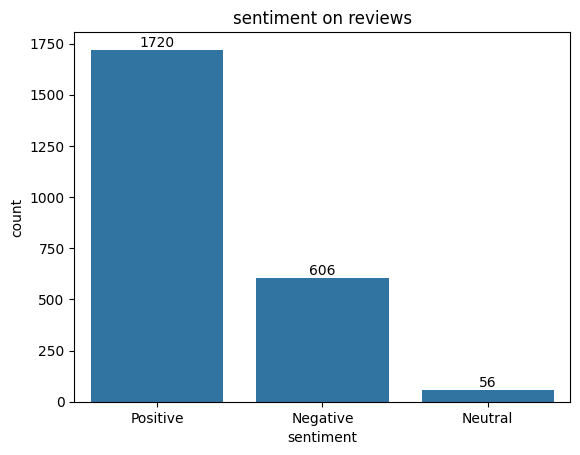

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(df["sentiment"].value_counts(),errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title("sentiment on reviews")
df["sentiment"].value_counts()

#plt.savefig("BA_sentiment.png")

### **Summary For the above data**
##### Positive-  1720   - 72.20%
##### Negative - 606   - 25.44%
##### Neutral -  56   - 2.35%

In [22]:
nltk.download("opinion_lexicon")
from nltk.corpus import opinion_lexicon
from collections import Counter
from wordcloud import WordCloud

# Negative words and positive words from Opinion Lexicon
negative_words = set(opinion_lexicon.negative())
positive_words = set(opinion_lexicon.positive())
negative_word_counts = Counter(word for text in df["fin_lem_text"] for word in text.split() if word in negative_words)
positive_word_counts = Counter(word for text in df["fin_lem_text"] for word in text.split() if word in positive_words)


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


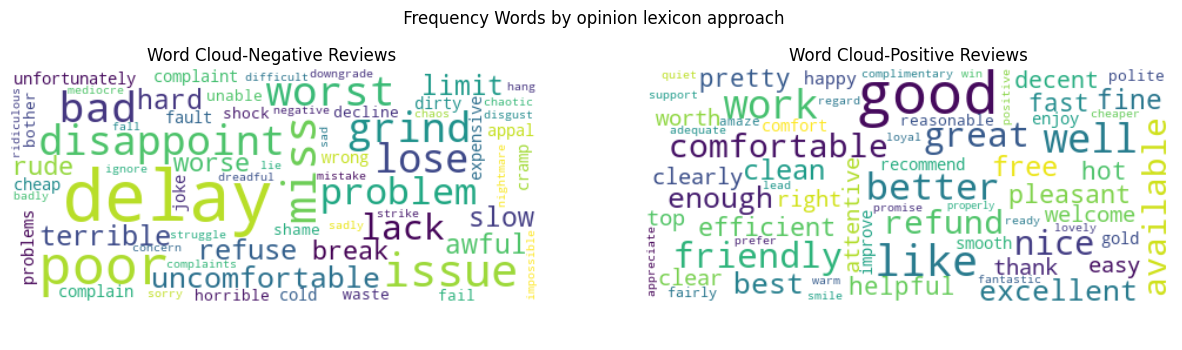

In [32]:
plt.figure(figsize=(15, 4))
plt.title(" Frequency Words by opinion lexicon approach")
plt.axis('off')
#negative words on reviews
wordcloud = WordCloud(width=450, height=200,max_font_size=60,min_font_size=8, background_color='white').generate_from_frequencies(negative_word_counts)
plt.subplot(1,2,1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud-Negative Reviews ')

#positive words on reviews 
wordcloud = WordCloud(width=450, height=200,max_font_size=50,min_font_size=8, background_color='white').generate_from_frequencies(positive_word_counts)
plt.subplot(1,2,2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud-Positive Reviews')
#plt.savefig("word_cloud.png")
plt.show()


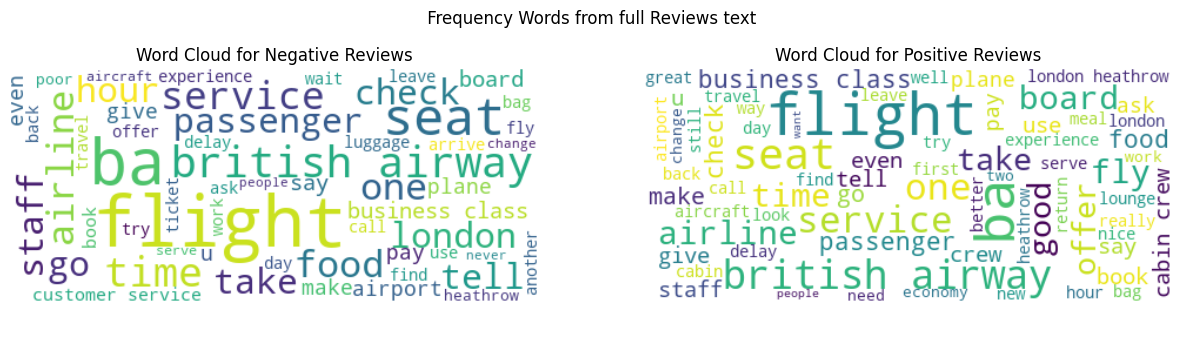

In [31]:
plt.figure(figsize=(15, 4))
plt.title(" Frequency Words from full Reviews text ")
plt.axis('off')
#negative reviews 
plt.subplot(1,2,1)
negative_reviews = ' '.join(df[df['sentiment'] == 'Negative']["fin_lem_text"])
wordcloud = WordCloud(width=450, height=200,max_font_size=60,min_font_size=8, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

###########Positive reviews 
plt.subplot(1,2,2)
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']["fin_lem_text"])
wordcloud = WordCloud(width=450, height=200,max_font_size=50,min_font_size=8,background_color="white").generate(positive_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
#plt.savefig("word_cloud1.png")
plt.show()